In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn import SpatioTemporalESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt

from scipy.ndimage.filters import convolve

Using Numpy backend.


In [25]:
inputLength = 5000
size = 50
data = np.linspace(0, 20*np.pi, inputLength)
data = np.tile(data, size*size).reshape(-1, size, size)

freq1 = np.random.rand(size, size)*0.5+0.5 
freq2 = np.random.rand(size, size)*0.5+0.5

freq1 = np.tile(freq1, inputLength).reshape(-1, size, size)
freq2 = np.tile(freq2, inputLength).reshape(-1, size, size)

inputData = np.sin(freq1*data).reshape(-1, size, size)
outputData = np.cos(freq2*data).reshape(-1, size, size)

filter1 = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])/9.0

for i in range(inputLength):
    outputData[i, :, :] = convolve(outputData[i, :, :], filter1)

trainingInput = inputData[:int(inputLength*0.7)]
validationInput = inputData[int(inputLength*0.3):]

trainingOutput = outputData[:int(inputLength*0.7)]
validationOutput = outputData[int(inputLength*0.3):]

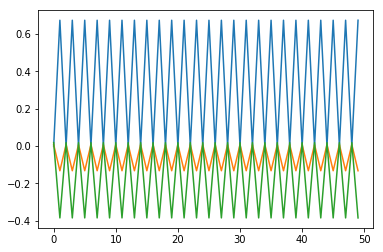

In [26]:
plt.plot(trainingInput[:50, 0,0])
plt.plot(trainingInput[:50, 0,1])
plt.plot(trainingInput[:50, 0,2])
plt.show()

In [10]:
esn = SpatioTemporalESN(inputShape=(size, size), filterSize=3, stride=1, borderMode="mirror", averageOutputWeights=True,
                        n_reservoir=100, regression_parameters=[1e-2], leakingRate=0.2, spectralRadius=0.8, solver="lsqr")

In [11]:
esn.fit(trainingInput, trainingOutput, transientTime=100, verbose=1)

In [12]:
prediction = esn.predict(validationInput, transientTime=0, verbose=1)

(3500, 50, 50)
(3500, 50, 50)
(5000, 50, 50)


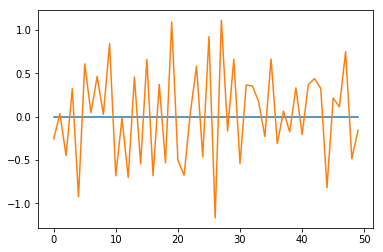

In [13]:
print(prediction.shape)
print(validationOutput.shape)
print(outputData.shape)

plt.plot(prediction[10, 10])
plt.plot(validationOutput[10, 10])
plt.show()

In [ ]:
opt = GradientOptimizer(esn, learningRate=0.001)
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForTrainError(trainingInput, trainingOutput, validationInput, validationOutput, epochs=150, transientTime=100)

In [ ]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()

In [ ]:
dd = [100, 2,3]
np.stack(np.meshgrid(*[np.arange(x) for x in dd[1:]]), axis=len(dd)-1).reshape(-1, len(dd)-1).tolist()

In [ ]:
from multiprocess import Pool, current_process

def func123(x):
    from multiprocess import current_process
    print(current_process().pid)
    return x

In [ ]:
p = Pool()
print(p.map(func123, range(100)))
p.close()

In [ ]:
a = list(range(10))
a.pop(0)
a

In [ ]:
np.arange(10)[::1]

In [ ]:
np.mean(np.arange(3*5*20).reshape(3,5,20), axis=0).shape

In [ ]:
for i in range(5, 1, -1):
    print(i)

In [ ]:
np.insert((1,2), 0, 3)

In [ ]:
np.empty((100, 1))[:, 0].shape